In [14]:
import pandas as pd
import numpy as np
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [15]:
df = pd.read_csv('data/data.csv', encoding='latin-1')

In [16]:
print(len(df))

1491


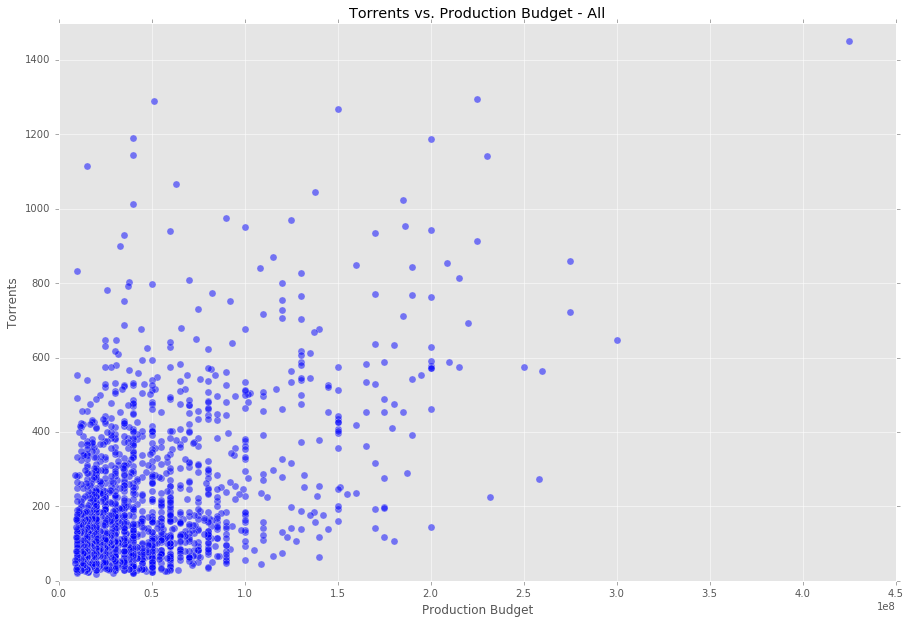

In [17]:
plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - All')
plt.scatter(df['Prod_Budget'], df['Total_Torrents'], alpha=0.5, s=50)

In [18]:
# unique list of grouped directors
unq_directors = df['Director'].unique()
unq_directors = unq_directors.tolist()

# unique list of individual directors
ind_director = set()

for lst in unq_directors:
    for director in lst.split(','):
        ind_director.add(director.strip())
ind_director = sorted(ind_director)

print(len(ind_director))
#print(ind_director)

817


In [19]:
# dictionary - count of director occurences
count = defaultdict(lambda:0)

for director in ind_director:
    count[director] = df.Director.str.contains(director).sum()

import operator
srt = sorted(count.items(), key=operator.itemgetter(1))
srt = srt[::-1]
#print(srt)
#print(count)

srt_five = [(director, ct) for director, ct in srt if ct > 5]
print(srt_five)
#print(len(srt_five))

[('Steven Spielberg', 16), ('Ridley Scott', 13), ('Robert Zemeckis', 10), ('McG', 10), ('Tony Scott', 10), ('Steven Soderbergh', 9), ('Richard Donner', 9), ('Tim Burton', 9), ('Robert Rodriguez', 8), ('Chris Columbus', 8), ('Brett Ratner', 8), ('Joel Schumacher', 8), ('Oliver Stone', 8), ('Peter Farrelly', 7), ('David Fincher', 7), ('John McTiernan', 7), ('Clint Eastwood', 7), ('Shawn Levy', 7), ('Antoine Fuqua', 7), ('Martin Scorsese', 7), ('Ethan Coen', 6), ('Ivan Reitman', 6), ('Phillip Noyce', 6), ('M. Night Shyamalan', 6), ('Brian De Palma', 6), ('Joel Coen', 6), ('Garry Marshall', 6), ('Ron Howard', 6), ('Barry Levinson', 6), ('Martin Campbell', 6), ('Bobby Farrelly', 6), ('Frank Coraci', 6), ('Adam Shankman', 6), ('Jaume Collet-Serra', 6), ('Wes Craven', 6), ('Paul W.S. Anderson', 6), ('F. Gary Gray', 6)]


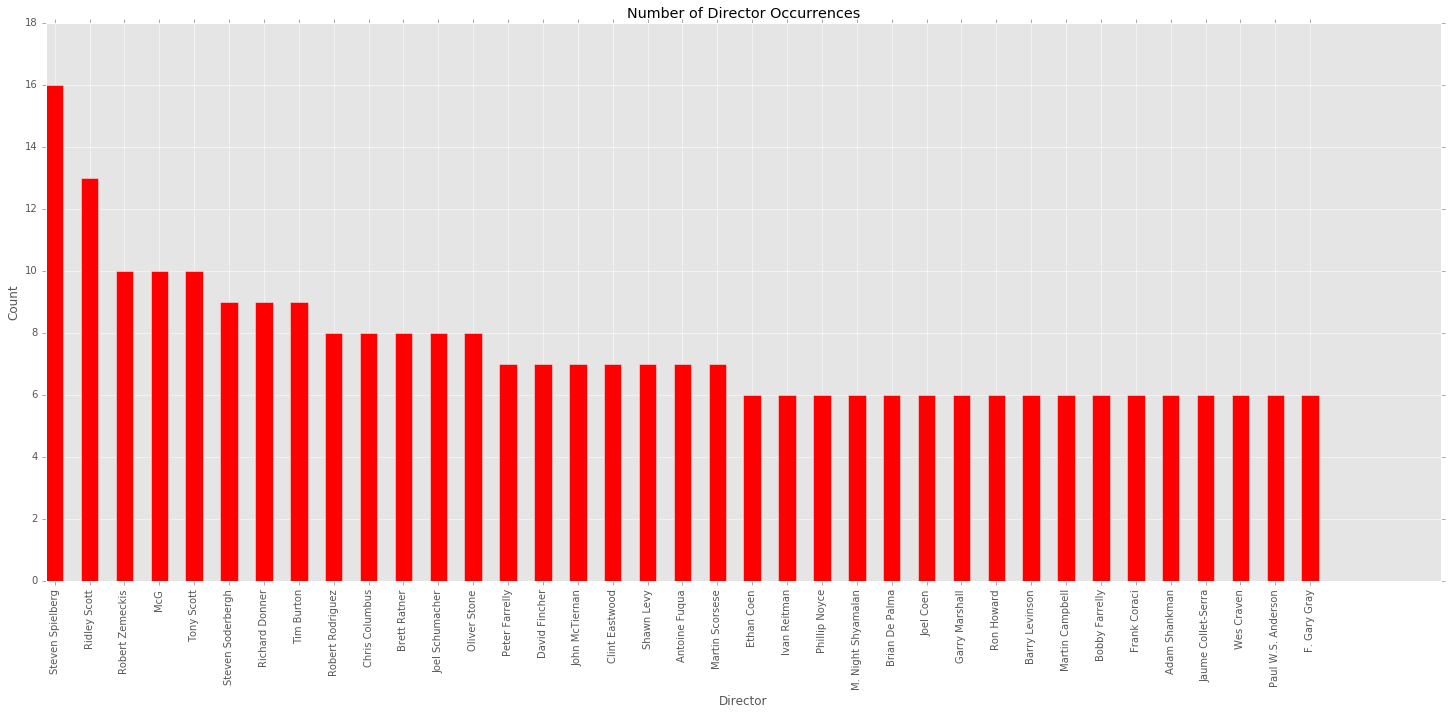

In [20]:
plt.figure(figsize=(25,10))

ind = np.arange(len(srt_five)) # the x locations for the groups
width = 0.5 # the width of the bars

bar_director = [director for director, count in srt_five]
bar_count = [count for director, count in srt_five]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Director')
plt.title('Number of Director Occurrences')
plt.xticks(ind + width/2.0, (bar_director), rotation='vertical')
plt.yticks(np.arange(0, 19, 2))
plt.show()

In [21]:
# return tuple of (string, list)
tup_lst = []
for director_gp in unq_directors:
    temp = []
    for director in director_gp.split():
        temp.append(director)
    tup_lst.append((director_gp, temp))

In [22]:
def srch_lst(term, t_lst):
    srch = []
    for st, lst in t_lst:
        if term in st:
            srch.append(st)
    return srch
print(srch_lst('Steven Spielberg', tup_lst))
print(srch_lst('Brad Lewis', tup_lst))

['Steven Spielberg']
['John Lasseter, Brad Lewis']


16


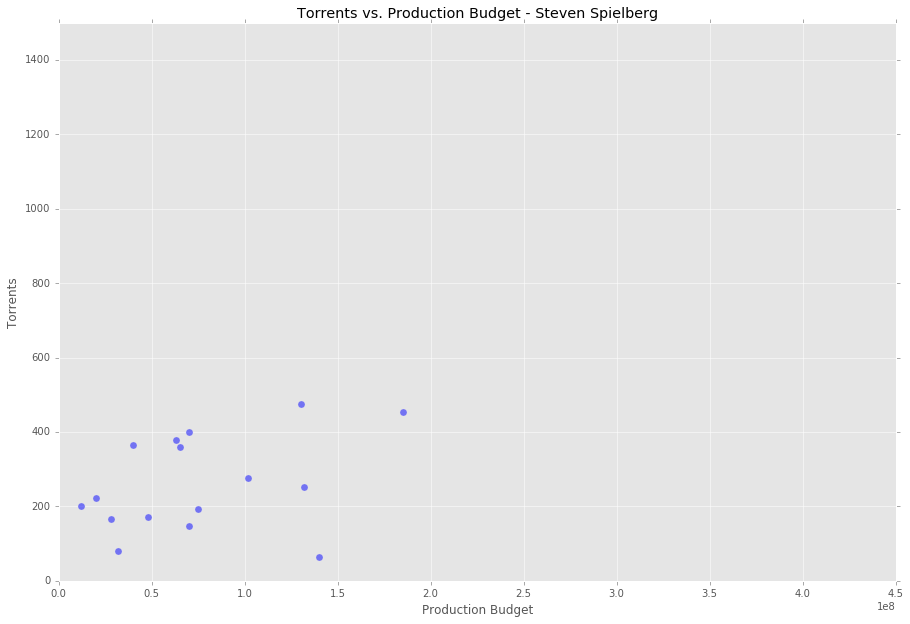

In [23]:
term = 'Steven Spielberg'
df_a = df.loc[df['Director'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

13


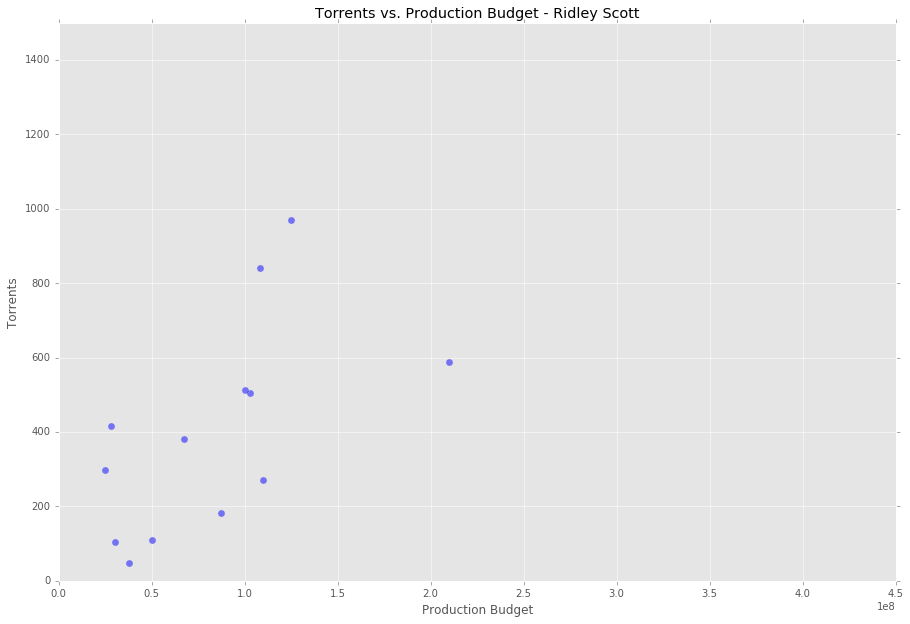

In [24]:
term = 'Ridley Scott'
df_a = df.loc[df['Director'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

0


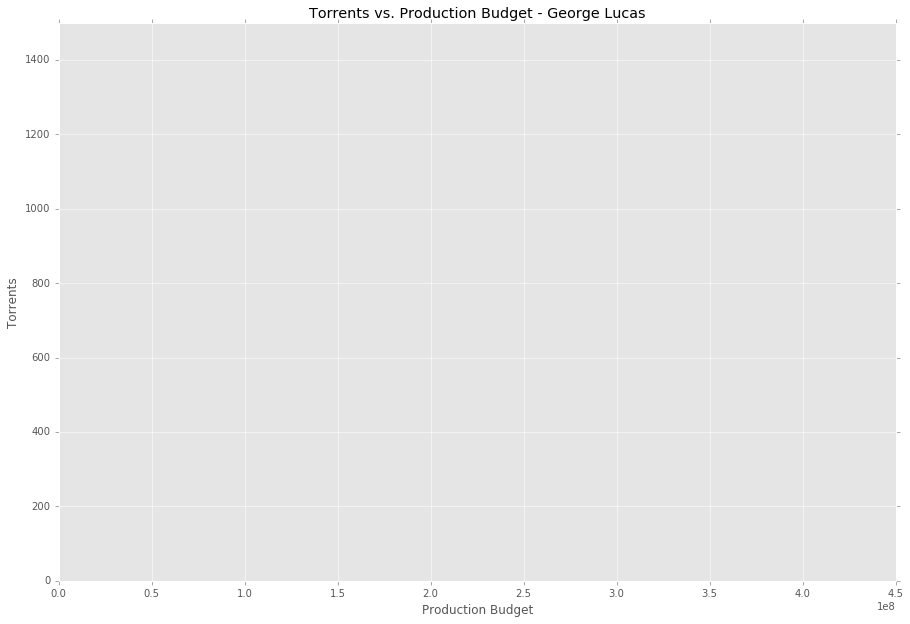

In [25]:
term = 'George Lucas'
df_a = df.loc[df['Director'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

5


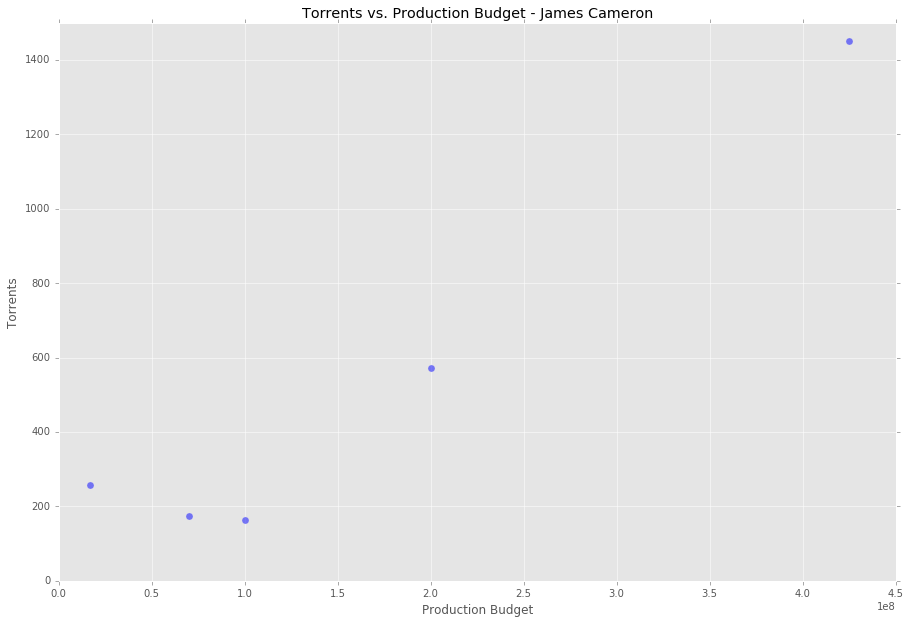

In [26]:
term = 'James Cameron'
df_a = df.loc[df['Director'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

5


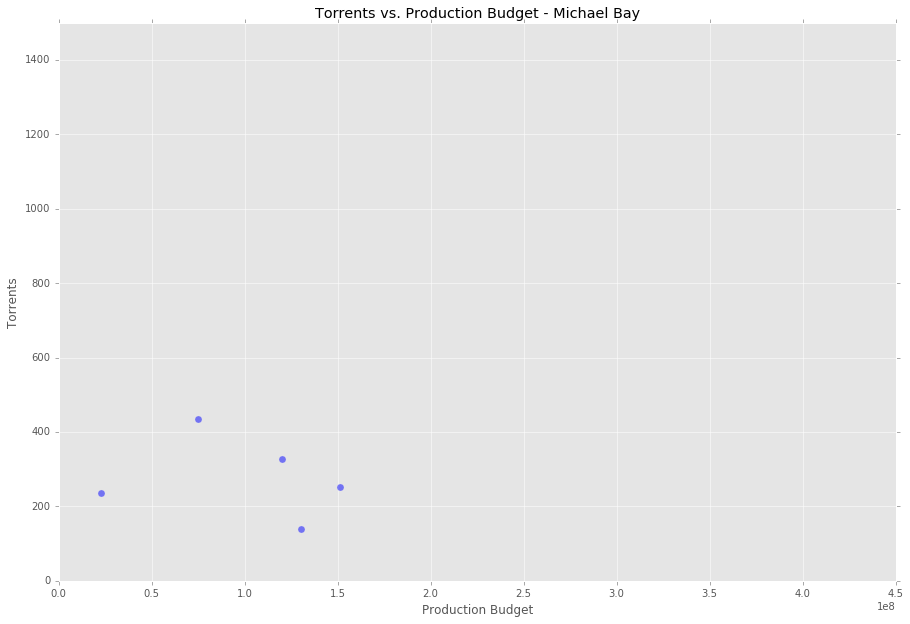

In [27]:
term = 'Michael Bay'
df_a = df.loc[df['Director'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

In [28]:
df['Director'].value_counts()

Steven Spielberg                             16
Ridley Scott                                 13
Tony Scott                                   10
Robert Zemeckis                              10
Tim Burton                                    9
Richard Donner                                9
Steven Soderbergh                             9
Joel Schumacher                               8
Chris Columbus                                8
Oliver Stone                                  8
Shawn Levy                                    7
Martin Scorsese                               7
Brett Ratner                                  7
Clint Eastwood                                7
David Fincher                                 7
Antoine Fuqua                                 7
Jaume Collet-Serra                            6
Brian De Palma                                6
Barry Levinson                                6
Wes Craven                                    6
Ron Howard                              

In [29]:
df_sub = df[['Prod_Budget', 'Director', 'Total_Torrents']]
df_sub.describe()

,Prod_Budget,Total_Torrents
count,1.491000e+03,1491.00000
mean,5.231981e+07,231.88397
std,4.425394e+07,201.28225
min,9.000000e+06,17.00000
25%,2.200000e+07,91.50000
50%,4.000000e+07,165.00000
75%,6.500000e+07,311.50000
max,4.250000e+08,1450.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d038e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10d1babe0>]], dtype=object)

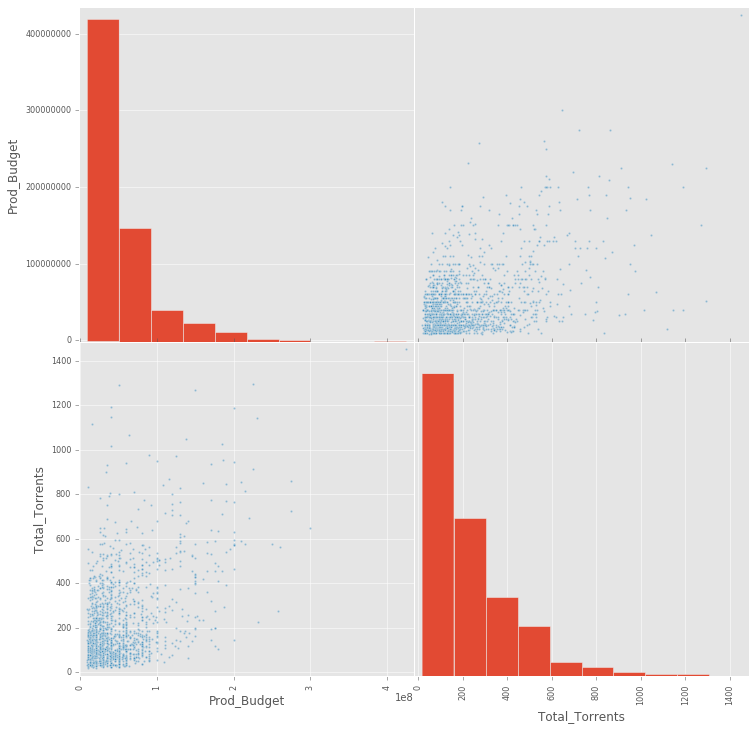

In [30]:
# Lets take a look at our entire model
plt.rcParams['figure.figsize'] = (12, 12)
pd.tools.plotting.scatter_matrix(df_sub)

In [31]:
from patsy import dmatrices

y, x = dmatrices('Total_Torrents ~ Prod_Budget + Director', data=df_sub, return_type='dataframe')

In [32]:
y.head()

,Total_Torrents
0,1450.0
1,647.0
2,861.0
3,723.0
4,563.0


In [33]:
x.head()

,Intercept,Director[T.Adam Shankman],Director[T.Adrian Lyne],Director[T.Akiva Goldsman],Director[T.Akiva Schaffer],Director[T.Alan J. Pakula],Director[T.Alan Parker],Director[T.Alan Poul],"Director[T.Albert Hughes, Allen Hughes]",Director[T.Alejandro Agresti],...,Director[T.Willard Huyck],Director[T.William A. Fraker],Director[T.William Brent Bell],Director[T.William Friedkin],Director[T.William Malone],Director[T.William Phillips],Director[T.Wolfgang Petersen],Director[T.Woody Allen],Director[T.Zack Snyder],Prod_Budget
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,425000000.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000000.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275000000.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275000000.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,260000000.0


In [41]:
import statsmodels.api as sm

model = sm.OLS(y, x)
results = model.fit()

#results.summary()

In [43]:
import statsmodels.formula.api as smf

results = smf.ols(formula='Total_Torrents ~ Prod_Budget + Director', data=df_sub,).fit()

#results.summary()

In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
model.score(x, y)

0.69334612682263175

In [47]:
#model.coef_

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10dca93c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115ea2940>]], dtype=object)

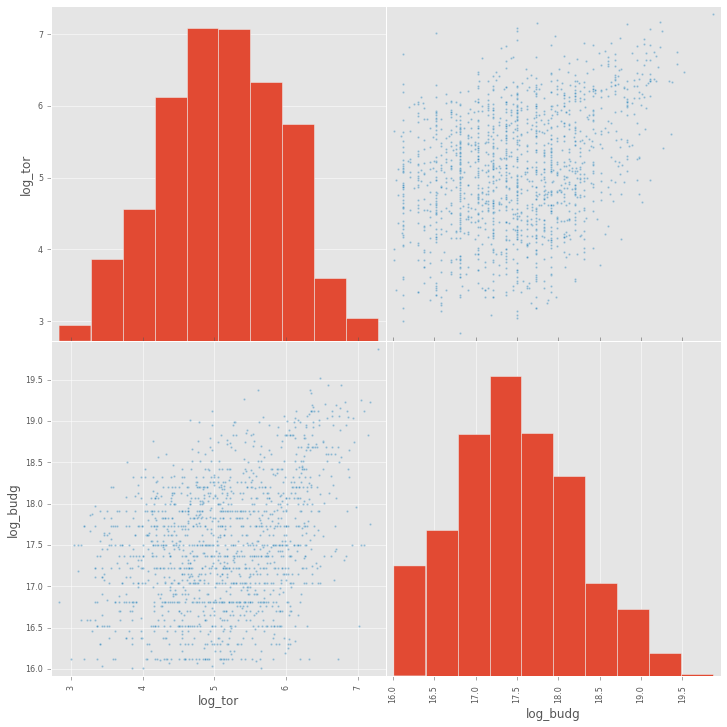

In [48]:
#data.yr=data.yr.replace({0:.25})

df_sub['log_tor']=np.log(df_sub.Total_Torrents)
df_sub['log_budg']=np.log(df_sub.Prod_Budget)

trans=df_sub[['log_tor','log_budg']]
pd.tools.plotting.scatter_matrix(trans)

In [49]:
y, x = dmatrices('log_tor ~ log_budg + Director', data=df_sub, return_type='dataframe')
x.head()

,Intercept,Director[T.Adam Shankman],Director[T.Adrian Lyne],Director[T.Akiva Goldsman],Director[T.Akiva Schaffer],Director[T.Alan J. Pakula],Director[T.Alan Parker],Director[T.Alan Poul],"Director[T.Albert Hughes, Allen Hughes]",Director[T.Alejandro Agresti],...,Director[T.Willard Huyck],Director[T.William A. Fraker],Director[T.William Brent Bell],Director[T.William Friedkin],Director[T.William Malone],Director[T.William Phillips],Director[T.Wolfgang Petersen],Director[T.Woody Allen],Director[T.Zack Snyder],log_budg
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.867600
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.519293
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.432282
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.432282
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.376192


In [50]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

model.score(x,y)

0.71446607543146812

In [51]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.333,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

In [54]:
sum_squares_regr= np.sum((model.predict(x_train) - np.mean(y_train))**2)
# estimated value of y - y_mean
total_sum_squares = np.sum((y_train - np.mean(y_train))**2)
r_squared = sum_squares_regr / total_sum_squares

print(sum_squares_regr)
print(total_sum_squares)
print(r_squared)

Exception: Data must be 1-dimensional

In [55]:
metrics.mean_squared_error(y_train,model.predict(x_train))

0.16839191727503885

In [56]:
#model.score(x_train, y_train)
metrics.mean_squared_error(y_test,model.predict(x_test))

9.718940830071387e+23

In [57]:
from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=5)

In [61]:
for train_index, test_index in kf:
    #X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    #y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    ## Fit on Train! 
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])
    # Score on Test! 
    #print(clf2.coef_, metrics.mean_squared_error(y.iloc[test_index], clf2.predict(x.iloc[test_index])))